In [ ]:
# Projeto: Predição de Emissões de CO2 com Machine Learning
# Autor: Cible Souza
# Data: 2025-11
#O projeto tem como foco fazer um piloto para a análise e Predição de Emissões de CO₂ com Machine Learning partir de variáveis socioeconômicas e energéticas, utilizando dados públicos do Kaggle.
#Para mais inforações leia o arquivo README
#o documento (co2_emission) retirado do Kaggle foi CO2_GHG_emissions-data ( dataset contains CO2 and GHG emissions for countries since 1750 until 2017.)
#-->C:/Users/User/Projetos/Projeto1/co2_emission.csv

#https://www.kaggle.com/datasets/yoannboyere/co2-ghg-emissionsdata

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Caminhos para cada output no caso
BASE_DIR = r"C:/Users/User/Projetos/Projeto1/"
DATA_PATH = BASE_DIR + "co2_emission.csv"
IMG_DIR = BASE_DIR + "imagens/"
TABLE_DIR = BASE_DIR + "tabelas/"
MODEL_DIR = BASE_DIR + "modelos/"

# Criar pastas se não existirem
for folder in [IMG_DIR, TABLE_DIR, MODEL_DIR]:
    os.makedirs(folder, exist_ok=True)

print("Diretórios configurados com sucesso.")


Diretórios configurados com sucesso.


In [10]:
#vendo as primeiras linhas dos dados do kaggle
df = pd.read_csv(DATA_PATH)
df.head()

# Salvar a tabela inicial para referência
df.to_csv(TABLE_DIR + "dados_brutos.csv", index=False)


In [12]:
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [16]:
df = df.dropna()
df.columns = df.columns.str.strip()

df.to_csv(TABLE_DIR + "dados_tratados.csv", index=False)


In [18]:
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [22]:
#PRIMEIRAMENTE VERIFICAR O CABEÇALHO OU SEJA QUAIS AS COLUNAS DO ARQUIVO
print(df.columns.tolist())



['Entity', 'Code', 'Year', 'Annual CO₂ emissions (tonnes )']


In [ ]:
#PADRONIZAÇÃO

In [24]:
# Renomeando a coluna para um nome padrão
df = df.rename(columns={
    'Entity': 'Country',
    'Annual CO₂ emissions (tonnes )': 'Emissions'
})

# Verificar
print(df.columns.tolist())


['Country', 'Code', 'Year', 'Emissions']


In [ ]:
#Grafico 1 - Evolulção Historica

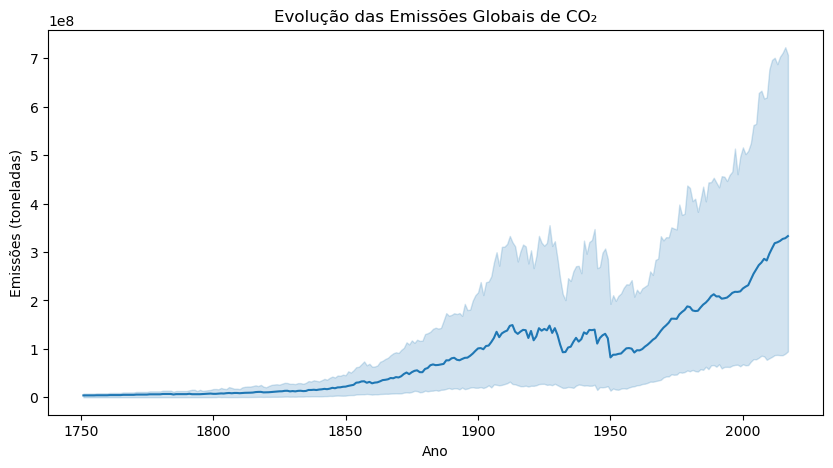

<Figure size 640x480 with 0 Axes>

✅ Gráfico salvo em: C:/Users/User/Projetos/Projeto1/imagens/Brazil_projecoes_futuras.png
✅ Tabela salva em: C:/Users/User/Projetos/Projeto1/tabelas/Brazil_projecoes_futuras.csv


In [53]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year", y="Emissions")
plt.title("Evolução das Emissões Globais de CO₂")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.savefig(IMG_DIR + "evolucao_emissoes.png", dpi=300, bbox_inches="tight")
plt.show()

# Salvar imagem
plt.savefig(IMG_DIR + f"{pais}_projecoes_futuras.png", dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Gráfico salvo em: {IMG_DIR}{pais}_projecoes_futuras.png")
print(f"✅ Tabela salva em: {TABLE_DIR}{pais}_projecoes_futuras.csv")


In [31]:
df.to_csv(TABLE_DIR + "dados_tratados.csv", index=False)



In [35]:
#conversão coluna numerica

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Emissions'] = pd.to_numeric(df['Emissions'], errors='coerce')
df = df.dropna(subset=['Year', 'Emissions'])


In [ ]:
#Graficos 2 = Tenndencia temporal em dialgo com a previ~sao climatica ano X emissao

In [41]:
pais = "Brazil"  # altere para o país que deseja analisar
df_pais = df[df['Country'] == pais].copy()

df_pais = df_pais.dropna(subset=['Year', 'Emissions'])
df_pais['Year'] = pd.to_numeric(df_pais['Year'])
df_pais['Emissions'] = pd.to_numeric(df_pais['Emissions'])



In [ ]:
#Brasil

In [45]:
df_pais.tail()



,Country,Code,Year,Emissions
3092,Brazil,BRA,2013,493593511.3
3093,Brazil,BRA,2014,519526349.7
3094,Brazil,BRA,2015,512081882.0
3095,Brazil,BRA,2016,473741376.0
3096,Brazil,BRA,2017,476066778.3


In [47]:
X = df_pais[['Year']]
y = df_pais['Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 4913626.830720766
R²: 0.9969794052739449


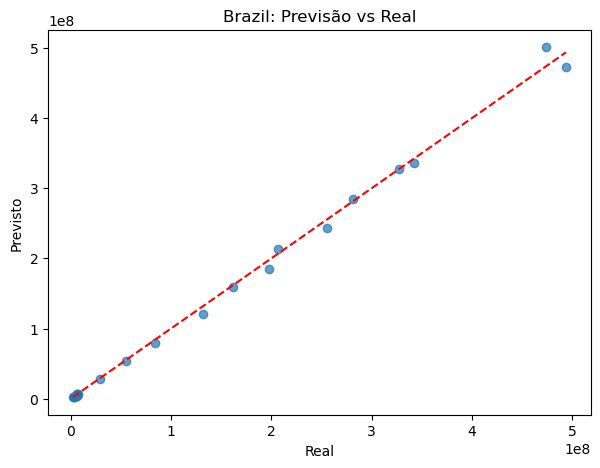

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"{pais}: Previsão vs Real")
plt.xlabel("Real")
plt.ylabel("Previsto")
plt.savefig(IMG_DIR + f"{pais}_real_vs_previsto.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
#Projeção futra - Brasil 2035 

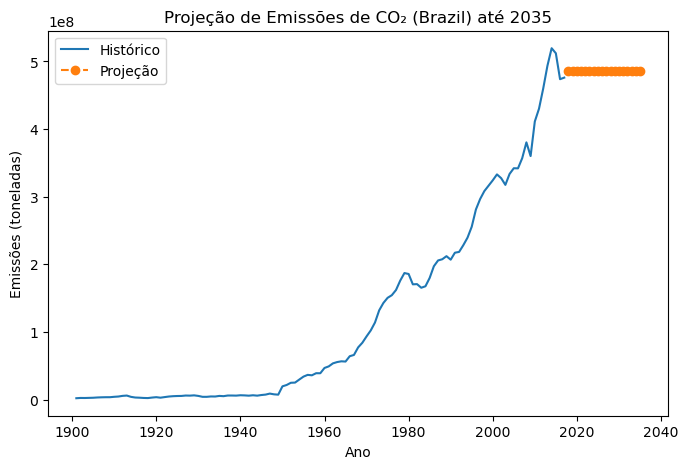

In [51]:
future_years = np.arange(df_pais['Year'].max()+1, 2036)
future_df = pd.DataFrame({'Year': future_years})
future_df['Predicted_Emissions'] = model.predict(future_df[['Year']])

future_df.to_csv(TABLE_DIR + f"{pais}_projecoes_futuras.csv", index=False)

plt.figure(figsize=(8,5))
plt.plot(df_pais['Year'], df_pais['Emissions'], label="Histórico")
plt.plot(future_df['Year'], future_df['Predicted_Emissions'], '--o', label="Projeção")
plt.title(f"Projeção de Emissões de CO₂ ({pais}) até 2035")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.legend()
plt.savefig(IMG_DIR + f"{pais}_projecoes_futuras.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
#Graficos 3- Espanha projetção futura 2035

In [55]:
#Definindo novamente o caminho de slavar as imagens pois estava salvando na pasta errada

In [57]:
import os

IMG_DIR = r"C:/Users/User/Projetos/Projeto2/imagens/"

os.makedirs(IMG_DIR, exist_ok=True)

print("Diretório de imagens configurado para:", IMG_DIR)


Diretório de imagens configurado para: C:/Users/User/Projetos/Projeto2/imagens/


In [59]:
'Annual CO₂ emissions (tonnes )'


'Annual CO₂ emissions (tonnes )'

In [61]:
#padronizando para apenas uma palavra unica  Emissions
#considereadndo tonnes
df = df.rename(columns={
    'Entity': 'Country',
    'Annual CO₂ emissions (tonnes )': 'Emissions'
})

print(df.columns.tolist())


['Country', 'Code', 'Year', 'Emissions']


In [63]:
#o documento é global sendo necessario filtrar a espanha apenas

pais = "Spain"
df_pais = df[df['Country'] == pais].copy()

df_pais.head()


,Country,Code,Year,Emissions
17122,Spain,ESP,1830,3664.0
17123,Spain,ESP,1831,3664.0
17124,Spain,ESP,1832,3664.0
17125,Spain,ESP,1833,3664.0
17126,Spain,ESP,1834,3664.0


In [ ]:
#limpando os dados e garantindo que sao numericos e limpos

In [65]:
df_pais['Year'] = pd.to_numeric(df_pais['Year'], errors='coerce')
df_pais['Emissions'] = pd.to_numeric(df_pais['Emissions'], errors='coerce')

df_pais = df_pais.dropna(subset=['Year', 'Emissions'])


In [ ]:
#Agora sim vamos começar a a treinar o modelo com Random Forest
#Na opção esconha o Randowm F

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_pais[['Year']]
y = df_pais['Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#criando uma projeção para espanha em 2035

In [69]:


future_years = np.arange(df_pais['Year'].max() + 1, 2036)
future_df = pd.DataFrame({'Year': future_years})

future_df['Predicted_Emissions'] = model.predict(future_df[['Year']])

future_df.head()


,Year,Predicted_Emissions
0,2018,2.746753e+08
1,2019,2.746753e+08
2,2020,2.746753e+08
3,2021,2.746753e+08
4,2022,2.746753e+08


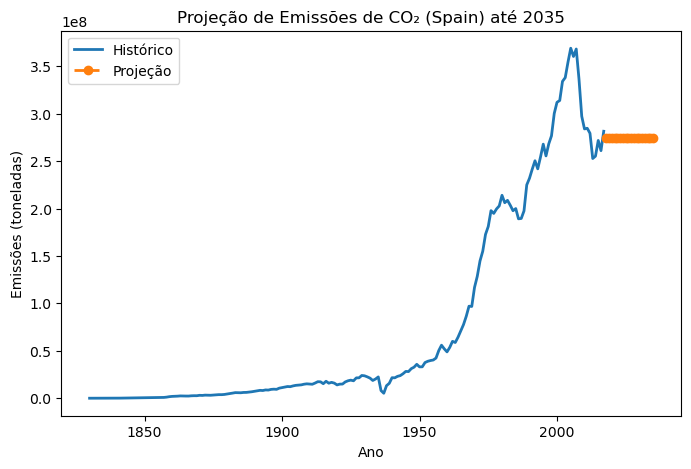

✅ Gráfico salvo em: C:/Users/User/Projetos/Projeto2/imagens/Spain_projecao_2035.png


In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_pais['Year'], df_pais['Emissions'], label="Histórico", linewidth=2)
plt.plot(future_df['Year'], future_df['Predicted_Emissions'], '--o', label="Projeção", linewidth=2)
plt.title(f"Projeção de Emissões de CO₂ ({pais}) até 2035")
plt.xlabel("Ano")
plt.ylabel("Emissões (toneladas)")
plt.legend()

file_path = IMG_DIR + f"{pais}_projecao_2035.png"
plt.savefig(file_path, dpi=300, bbox_inches="tight")
plt.show()

print("✅ Gráfico salvo em:", file_path)
